In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pymc import MCMC
import seaborn
import corner
import numpy as np
from parmed.topologyobjects import DihedralType

In [2]:
from torsionfit.toy_model import ToyModel

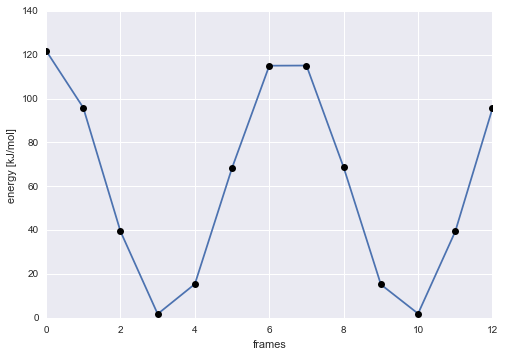

In [12]:
#toy = ToyModel(true_value=DihedralType(1, 1, 180, 1, 1), initial_value=DihedralType(1, 1, 0, 1, 1))
toy = ToyModel()
plt.plot(toy.synthetic_energy)
plt.plot(toy.synthetic_energy, 'ko')
plt.xlabel('frames')
plt.ylabel('energy [kJ/mol]')


In [13]:
print(toy.true_value)
print(toy.initial_value)
toy._param.dihedral_types[toy._dih_type][0].phi_k
toy._struct.dihedral_types

<DihedralTypes [<DihedralType; phi_k=14.586, per=4, phase=0.000,  scee=1.000, scnb=1.000>]>
<DihedralTypes [<DihedralType; phi_k=9.713, per=3, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=18.109, per=1, phase=180.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=12.885, per=2, phase=180.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=6.128, per=4, phase=180.000,  scee=1.000, scnb=1.000>]>


TrackedList([
	<DihedralTypes [<DihedralType; phi_k=9.713, per=3, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=18.109, per=1, phase=180.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=12.885, per=2, phase=180.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=6.128, per=4, phase=180.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.000, per=6, phase=0.000,  scee=1.000, scnb=1.000>]>
])

In [ ]:
# sample
sampler = MCMC(toy.model.pymc_parameters)
sampler.sample(iter=20000)

 [-----            14%                  ] 2919 of 20000 complete in 59.8 sec

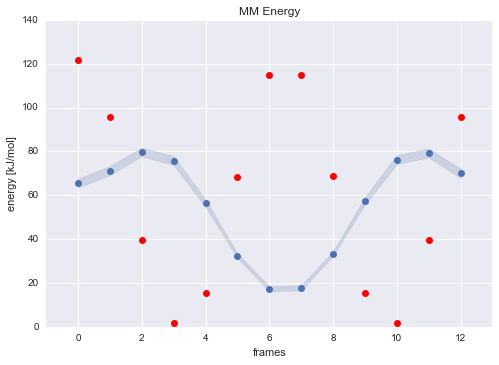

In [15]:
seaborn.tsplot(sampler.trace('mm_energy')[:], interpolate=False)
plt.plot(toy.synthetic_energy, 'o', color='r')
plt.title('MM Energy')
plt.xlabel('frames')
plt.ylabel('energy [kJ/mol]')

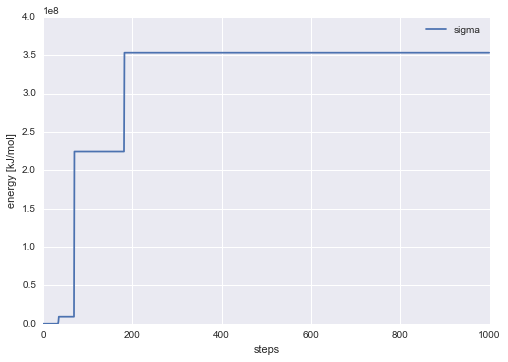

In [16]:
plt.plot(np.exp(sampler.trace('sigma')[:]), label='sigma')
plt.legend()
plt.xlabel('steps')
plt.ylabel('energy [kJ/mol]')

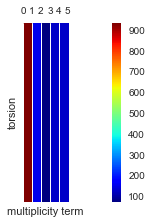

In [17]:
import torsionfit.plots as plots
plots.marg_mult(toy.model, sampler, 10000, 0, 'random.png')


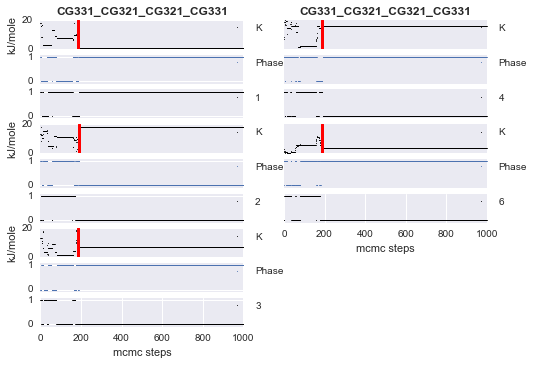

In [18]:
plots.trace_plots('CG331_CG321_CG321_CG331', sampler, markersize=2.0)

(array([     0.,      0.,      0.,      0.,      0.,  10000.,      0.,
             0.,      0.,      0.]),
 array([ 0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5]),
 <a list of 10 Patch objects>)

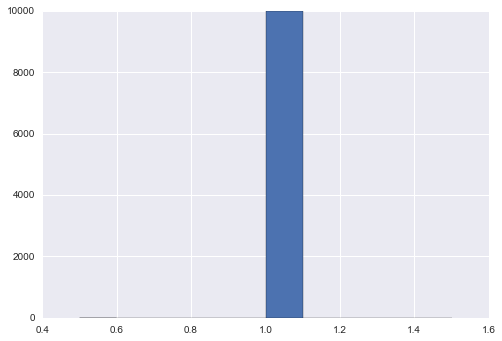

In [10]:
plt.hist(sampler.CG331_CG321_CG321_CG331_1_Phase.trace[:])

In [10]:
data = np.stack((sampler.CG331_CG321_CG321_CG331_1_K.trace[100:],
                sampler.CG331_CG321_CG321_CG331_2_K.trace[100:], sampler.CG331_CG321_CG321_CG331_3_K.trace[100:], 
                sampler.CG331_CG321_CG321_CG331_4_K.trace[100:], sampler.CG331_CG321_CG321_CG331_6_K.trace[100:]), axis=1)

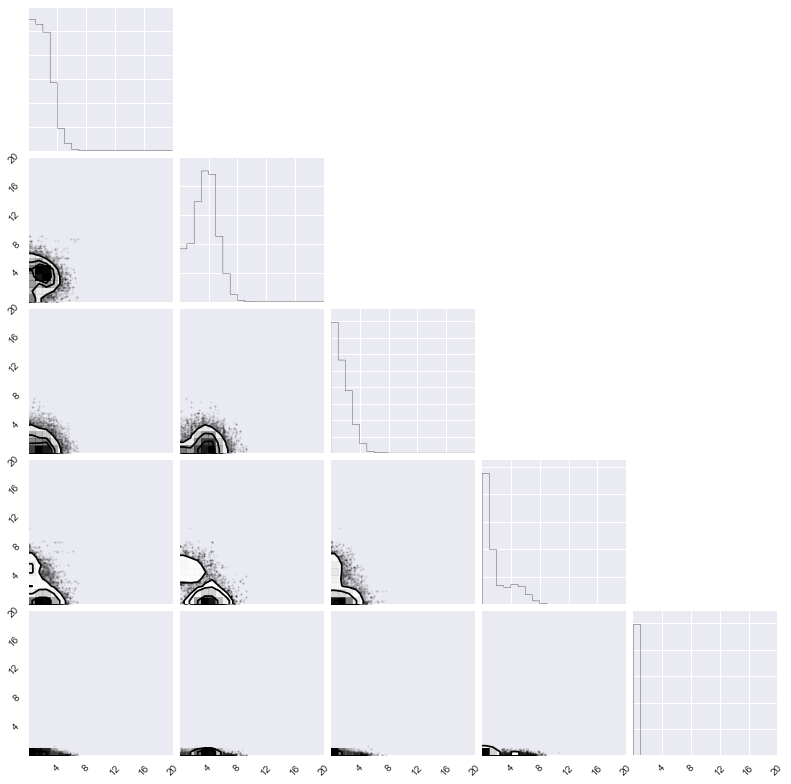

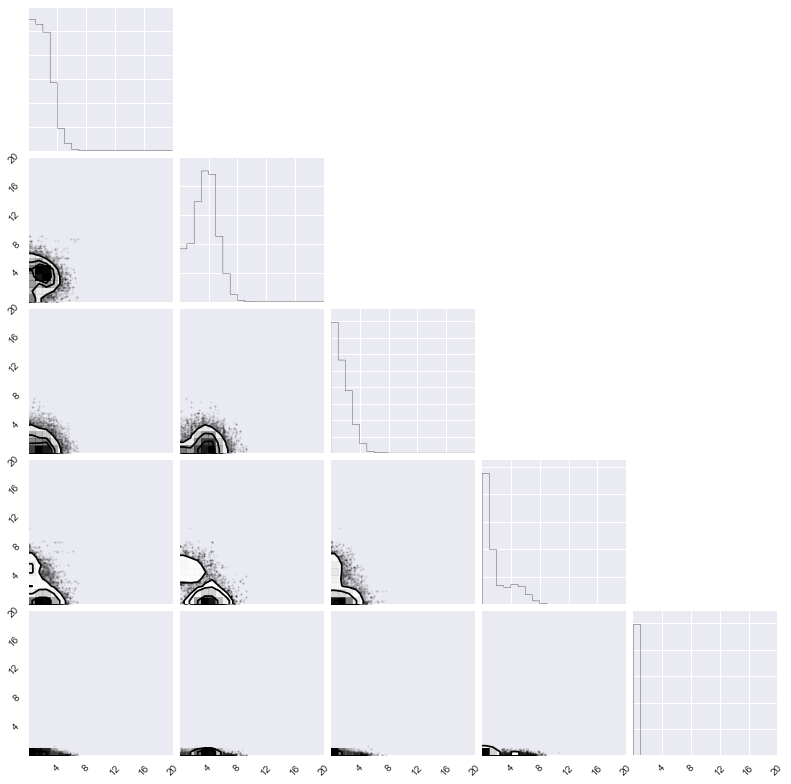

In [11]:
corner.corner(data, plot_countours=False, range=[(0, 20), (0,20), (0,20), (0,20), (0,20)])

In [10]:
toy.initial_value

<DihedralType; phi_k=1.000, per=1, phase=0.000,  scee=1.000, scnb=1.000>

In [11]:
toy._param.dihedral_types[toy._dih_type]

<DihedralTypes [<DihedralType; phi_k=1.000, per=1, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.000, per=2, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.000, per=3, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.000, per=4, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.000, per=6, phase=0.000,  scee=1.000, scnb=1.000>]>

In [12]:
toy.true_value

<DihedralTypes [<DihedralType; phi_k=1.000, per=1, phase=180.000,  scee=1.000, scnb=1.000>]>

In [13]:
toy._struct.dihedral_types

TrackedList([
	<DihedralTypes [<DihedralType; phi_k=1.000, per=1, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.000, per=2, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.000, per=3, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.000, per=4, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.000, per=6, phase=0.000,  scee=1.000, scnb=1.000>]>
])